<a href="https://colab.research.google.com/github/BeratKARATAS53/Data-Intensive-Applications-Assignments/blob/master/Assignment2/21527142_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Upload File
# from google.colab import files
# uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import math
import numpy as np
import pandas as pd

OD = pd.read_csv('data.csv', index_col=False,)
OD.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
OD.shape

(569, 33)

In [4]:
# Review data types with "info()". Check if any missing or NaN values
OD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
OD.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
# Unnamed column have a null values, I drop it
OD.drop('Unnamed: 32', axis=1, inplace=True)
# Id column is redundant and not useful, I drop it
OD.drop('id', axis=1, inplace=True)
OD.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
OD.diagnosis.unique()

array(['M', 'B'], dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


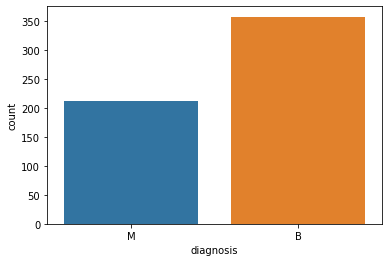

In [8]:
import seaborn as sns
sns.countplot(OD['diagnosis'], label = "Count")

In [9]:
# Mapping target variable to 1 and 0
OD['diagnosis'].replace({'M':1, 'B':0}, inplace=True)
OD.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


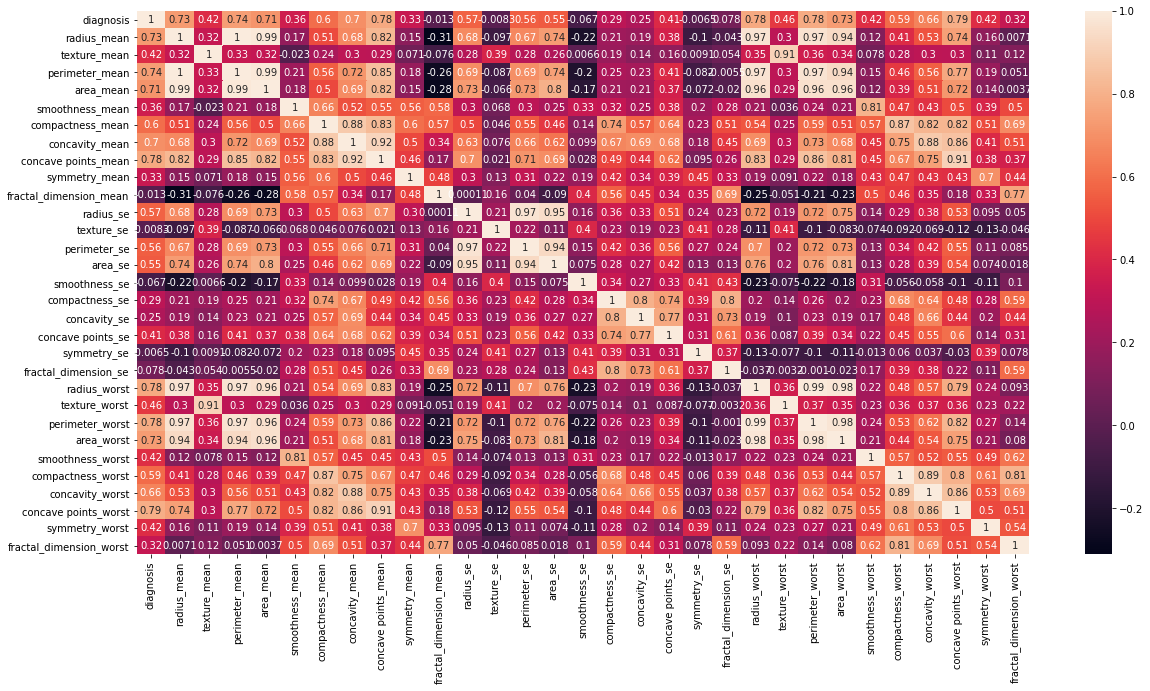

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
OD_corr = OD.corr()
sns.heatmap(OD_corr, annot=True)

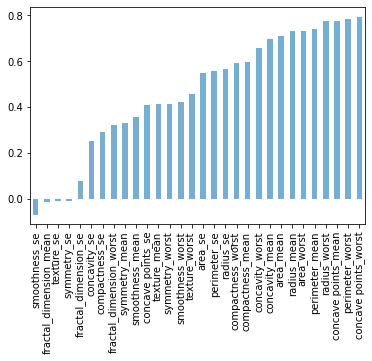

In [28]:
tst = OD_corr['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

In [13]:
# OD - Split Data

X_OD = OD.drop('diagnosis',axis=1).values
y_OD = OD['diagnosis'].values

# split data into training and testing with a ratio of 80:20 using sklearn
from sklearn.model_selection import train_test_split

X_OD_train, X_OD_test, y_OD_train, y_OD_test = train_test_split(X_OD, y_OD, test_size = 0.20, random_state=5)

print("X Train:", X_OD_train.shape, "\nX Test:", X_OD_test.shape, "\nY Train:", y_OD_train.shape, "\nY Test:", y_OD_test.shape)

X Train: (455, 30) 
X Test: (114, 30) 
Y Train: (455,) 
Y Test: (114,)


Text(0.5, 1.0, 'KMeans clustering plot')

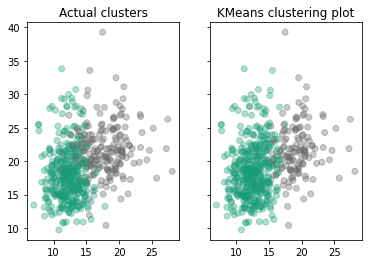

In [30]:
from sklearn.cluster import KMeans
k_mean_OD = KMeans(n_clusters = 2, init = "k-means++", n_init = 10)
OD_kmean = k_mean_OD.fit_predict(X_OD)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X_OD[:,0], X_OD[:,1], c=OD["diagnosis"], cmap="Dark2", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X_OD[:,0], X_OD[:,1], c=OD_kmean, cmap="Dark2", alpha=0.35)
ax2.set_title("KMeans clustering plot")

In [0]:
# Min-Max Scaling
from mlxtend.preprocessing import minmax_scaling

ND = minmax_scaling(OD, columns = OD.columns.values)

In [16]:
X_ND = ND.drop('diagnosis',axis=1).values
y_ND = ND['diagnosis'].values

# split data into training and testing with a ratio of 80:20 using sklearn
from sklearn.model_selection import train_test_split

X_ND_train, X_ND_test, y_ND_train, y_ND_test = train_test_split(X_ND, y_ND, test_size = 0.20, random_state=5)

print("X Train:", X_ND_train.shape, "\nX Test:", X_ND_test.shape, "\nY Train:", y_ND_train.shape, "\nY Test:", y_ND_test.shape)

X Train: (455, 30) 
X Test: (114, 30) 
Y Train: (455,) 
Y Test: (114,)


Text(0.5, 1.0, 'KMeans clustering plot')

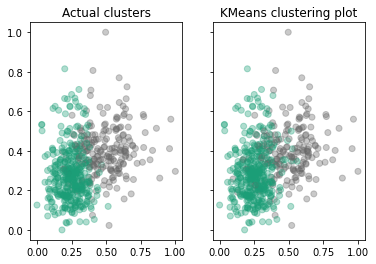

In [17]:
from sklearn.cluster import KMeans
k_mean_ND = KMeans(n_clusters = 2, init = "k-means++", n_init = 10)
ND_kmean = k_mean_ND.fit_predict(X_ND)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X_ND[:,0], X_ND[:,1], c=ND["diagnosis"], cmap="Dark2", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X_ND[:,0], X_ND[:,1], c=ND_kmean, cmap="Dark2", alpha=0.35)
ax2.set_title("KMeans clustering plot")

In [18]:
# train our model using SVM algorithm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC(gamma='auto')
svc_model.fit(X_OD_train, y_OD_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        66
           1       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


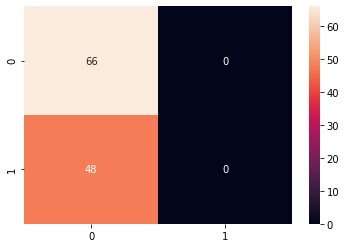

In [19]:
# predict using the trained model
y_OD_predict = svc_model.predict(X_OD_test)
#create confusion matrix
cm = confusion_matrix(y_OD_test, y_OD_predict)
# prepare heatmap
sns.heatmap(cm, annot= True)

print(classification_report(y_OD_test, y_OD_predict))

In [20]:
# ND dataset classification
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_ND_train, y_ND_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        66
         1.0       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



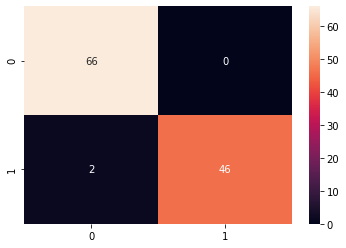

In [21]:
# predict using the trained model
y_ND_predict = svc_model.predict(X_ND_test)
#create confusion matrix
cm = confusion_matrix(y_ND_test, y_ND_predict)
# prepare heatmap
sns.heatmap(cm, annot= True)

print(classification_report(y_ND_test,y_ND_predict))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_OD_train, y_OD_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        66
           1       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



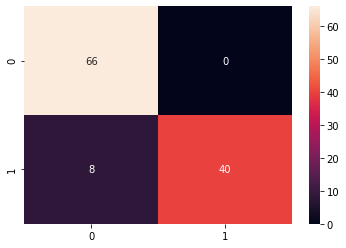

In [23]:
# predict using the trained model
y_OD_predict = classifier.predict(X_OD_test)
#create confusion matrix
cm = confusion_matrix(y_OD_test, y_OD_predict)
# prepare heatmap
sns.heatmap(cm, annot= True)

print(classification_report(y_OD_test,y_OD_predict))

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_ND_train, y_ND_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        66
         1.0       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



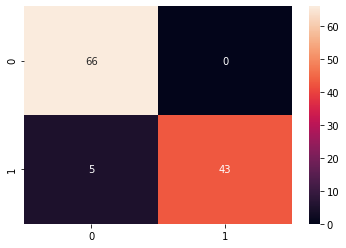

In [25]:
# predict using the trained model
y_ND_predict = classifier.predict(X_ND_test)
#create confusion matrix
cm = confusion_matrix(y_ND_test, y_ND_predict)
# prepare heatmap
sns.heatmap(cm, annot= True)

print(classification_report(y_ND_test, y_ND_predict))

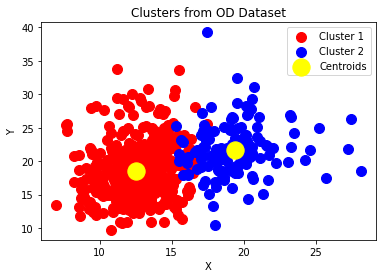

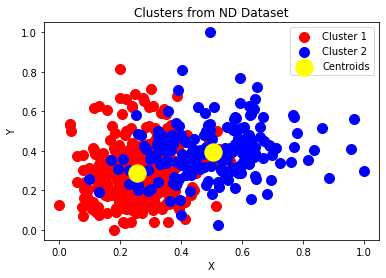

In [26]:
# # Visualising the clusters
# plt.scatter(X_OD[OD_kmean == 0, 0], X_OD[OD_kmean == 0, 1], s=100, c='red', label='Cluster 1')
# plt.scatter(X_OD[OD_kmean == 1, 0], X_OD[OD_kmean == 1, 1], s=100, c='blue', label='Cluster 2')
# plt.scatter(k_mean_OD.cluster_centers_[:, 0], k_mean_OD.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
# plt.title('Clusters from OD Dataset')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

# plt.scatter(X_ND[ND_kmean == 0, 0], X_ND[ND_kmean == 0, 1], s=100, c='red', label='Cluster 1')
# plt.scatter(X_ND[ND_kmean == 1, 0], X_ND[ND_kmean == 1, 1], s=100, c='blue', label='Cluster 2')
# plt.scatter(k_mean_ND.cluster_centers_[:, 0], k_mean_ND.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
# plt.title('Clusters from ND Dataset')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

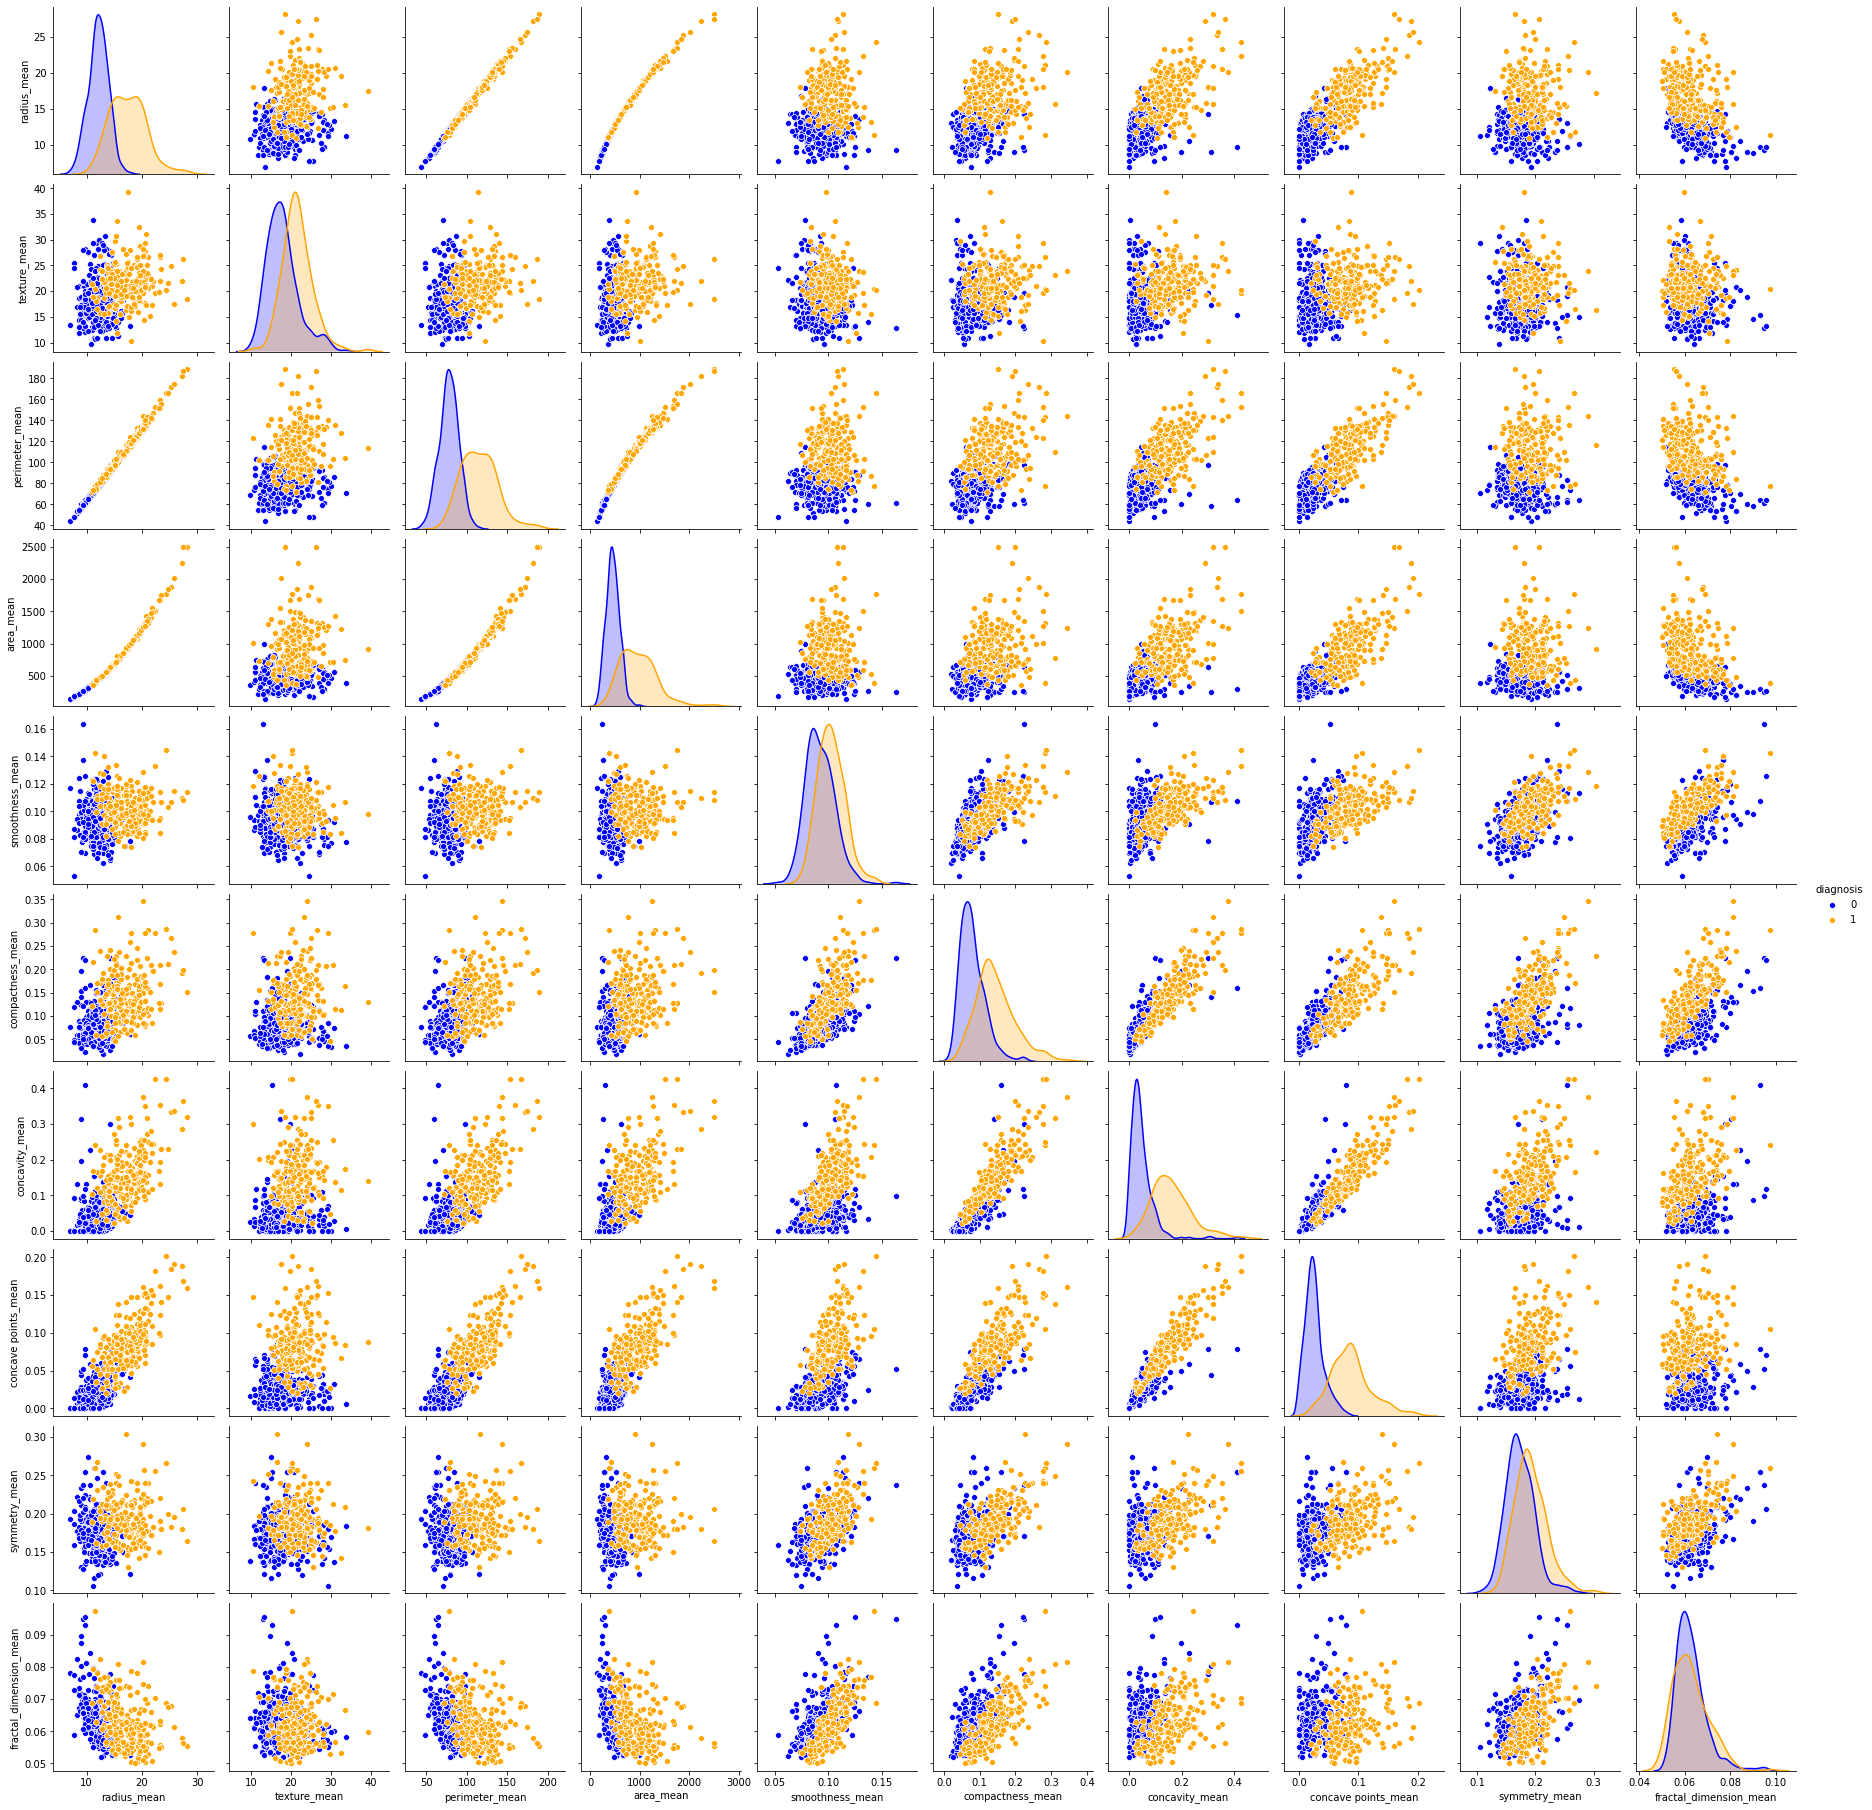

In [31]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(OD, hue = 'diagnosis', vars = features_mean, palette=sns.color_palette(['blue', 'orange']))
plt.show()